## Import libraries

In [7]:
# basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn tools
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE, KMeansSMOTE, SMOTENC

## Reading data (to show the results of the analysis, we use the learning data on kaggle as a entire data set)

In [8]:
df_learn = pd.read_csv('breast-cancer-diagnostic.shuf.lrn.csv')
#df_kaggle = pd.read_csv('breast-cancer-diagnostic.shuf.tes.csv')
df_learn = df_learn.drop('ID', axis=1)

df_learn

,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,False,13.34,15.86,86.49,520.0,0.10780,0.15350,0.116900,0.069870,0.1942,...,15.53,23.19,96.66,614.9,0.1536,0.47910,0.48580,0.17080,0.3527,0.10160
1,True,16.24,18.77,108.80,805.1,0.10660,0.18020,0.194800,0.090520,0.1876,...,18.55,25.09,126.90,1031.0,0.1365,0.47060,0.50260,0.17320,0.2770,0.10630
2,False,16.17,16.07,106.30,788.5,0.09880,0.14380,0.066510,0.053970,0.1990,...,16.97,19.14,113.10,861.5,0.1235,0.25500,0.21140,0.12510,0.3153,0.08960
3,False,14.95,18.77,97.84,689.5,0.08138,0.11670,0.090500,0.035620,0.1744,...,16.25,25.47,107.10,809.7,0.0997,0.25210,0.25000,0.08405,0.2852,0.09218
4,True,15.34,14.26,102.50,704.4,0.10730,0.21350,0.207700,0.097560,0.2521,...,18.07,19.08,125.10,980.9,0.1390,0.59540,0.63050,0.23930,0.4667,0.09946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,True,18.46,18.52,121.10,1075.0,0.09874,0.10530,0.133500,0.087950,0.2132,...,22.93,27.68,152.20,1603.0,0.1398,0.20890,0.31570,0.16420,0.3695,0.08579
281,False,12.62,23.97,81.35,496.4,0.07903,0.07529,0.054380,0.020360,0.1514,...,14.20,31.31,90.67,624.0,0.1227,0.34540,0.39110,0.11800,0.2826,0.09585
282,False,12.30,19.02,77.88,464.4,0.08313,0.04202,0.007756,0.008535,0.1539,...,13.35,28.46,84.53,544.3,0.1222,0.09052,0.03619,0.03983,0.2554,0.07207
283,True,16.02,23.24,102.70,797.8,0.08206,0.06669,0.032990,0.033230,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.15510,0.14590,0.09975,0.2948,0.08452


## Plot of the first 3 features before pre-processing

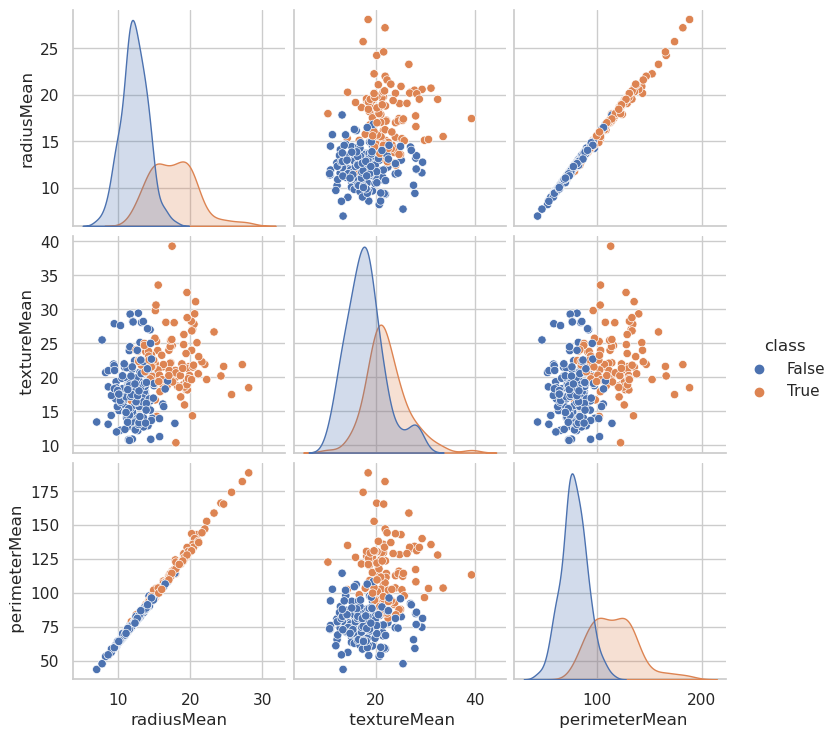

In [9]:
df_plot = df_learn[["radiusMean"," textureMean"," perimeterMean","class"]]
sns.set_theme(style="whitegrid")
sns.pairplot(df_plot, hue="class")
plt.show()

## Standardization 

In [10]:
# Preprocessing Standardization of df_learn
scaler = StandardScaler()
df_learn1=df_learn.loc[:, df_learn.columns != 'class']
scaler.fit(df_learn1)
sca_df_learn=pd.DataFrame(scaler.transform(df_learn1))
sca_df_learn = sca_df_learn.set_axis(df_learn1.columns, axis=1)#, copy=False) 
sca_df_learn['class']=df_learn['class']
'''
# Preprocessing Standardization of df_kaggle
scaler.fit(df_kaggle)
sca_df_kaggle=pd.DataFrame(scaler.transform(df_kaggle))
sca_df_kaggle = sca_df_kaggle.set_axis(df_kaggle.columns, axis=1)#, copy=False) #ask!!!

sca_df_kaggle = sca_df_kaggle.drop('ID', axis=1)
'''

"\n# Preprocessing Standardization of df_kaggle\nscaler.fit(df_kaggle)\nsca_df_kaggle=pd.DataFrame(scaler.transform(df_kaggle))\nsca_df_kaggle = sca_df_kaggle.set_axis(df_kaggle.columns, axis=1)#, copy=False) #ask!!!\n\nsca_df_kaggle = sca_df_kaggle.drop('ID', axis=1)\n"

## Splitting data in train set and test set

In [11]:
# Divide learning dataset and training dataset
X = sca_df_learn
y = sca_df_learn['class']
X = X.drop('class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

X_train

,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,fractalDimensionMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
208,0.004807,-0.601118,-0.107191,-0.100795,-2.417255,-1.441599,-0.996000,-1.073081,-1.177771,-1.368931,...,-0.316320,-0.871675,-0.414210,-0.378335,-2.187725,-1.268945,-1.094667,-1.252200,-0.770334,-1.250714
191,-0.014744,0.788865,0.056605,-0.163934,0.851655,2.556570,1.268438,0.408760,2.158728,2.030611,...,-0.147525,1.693993,-0.066760,-0.242772,0.981680,4.105389,2.583764,0.915630,3.639067,3.350695
51,-1.009016,-0.969574,-1.025175,-0.887946,-0.629605,-1.138406,-1.082021,-1.227619,0.421920,-0.428799,...,-1.001671,-1.096734,-1.031254,-0.859778,-1.160000,-1.162048,-1.270202,-1.754416,-0.360006,-1.226438
146,1.655410,1.607410,1.639434,1.571971,0.212398,1.170116,0.865028,1.900245,0.220054,-0.358171,...,1.570936,1.170926,1.490374,1.340428,-0.213349,0.504998,0.411140,1.488214,0.553463,-0.416502
133,-0.746483,1.091131,-0.753925,-0.699920,-1.626695,-0.880123,-0.847806,-0.902964,0.448582,-0.581041,...,-0.818639,0.831010,-0.793326,-0.740942,-1.729396,-0.746702,-0.941516,-1.028893,0.509500,-0.905885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,-0.185110,1.199241,-0.197742,-0.239590,-0.103069,-0.354053,-0.058664,-0.117660,-0.793083,-0.592027,...,0.106685,1.397537,-0.002848,0.008317,-0.274272,-0.392206,0.168678,0.029633,-0.456075,-0.546158
262,-1.179383,-0.444469,-1.149129,-0.995867,0.337223,-0.574879,-0.784091,-0.788729,0.277186,0.129944,...,-1.078951,0.089092,-1.066696,-0.902119,0.367763,-0.721729,-0.791181,-0.775148,-0.060401,-0.398847
197,0.191931,-0.098077,0.163657,0.051351,-0.478302,-0.109560,-0.377239,-0.036064,0.235290,-0.621848,...,-0.043807,-0.011796,0.011677,-0.160179,-0.049325,0.269886,-0.451098,0.489207,0.050323,0.046949
131,-0.819099,-0.206187,-0.813085,-0.772238,0.654961,-0.356289,-0.571588,-0.586222,0.418111,-0.058396,...,-0.812538,-0.502269,-0.858401,-0.737282,0.747361,-0.616964,-0.532827,-0.467309,0.209895,-0.884919


## Cutting of the outliers / Plot of train set after pre-processing

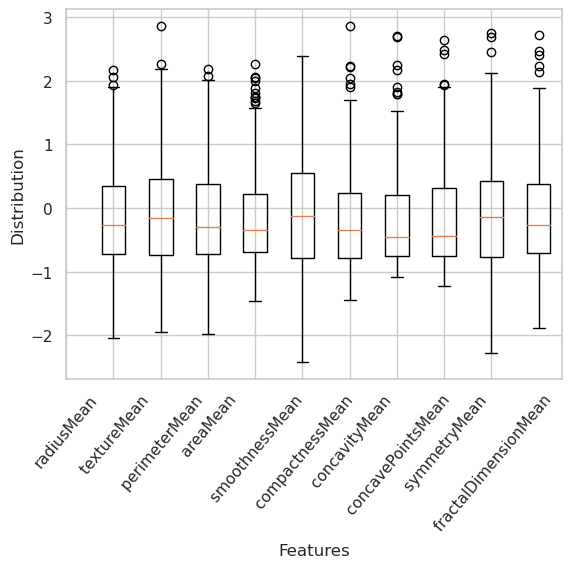

In [12]:
#cutting away outliers
sca_df_learn_pre = sca_df_learn
for i in sca_df_learn.columns:
    sca_df_learn = sca_df_learn[sca_df_learn[i] < 3.]
    sca_df_learn = sca_df_learn[sca_df_learn[i] > -3.]

colonne = sca_df_learn.iloc[:,:10].columns

fig = plt.gcf()

plt.boxplot(sca_df_learn.iloc[:,:10])
plt.xticks(range(len(colonne)), colonne, rotation = 50)
#fig = plt.figure(figsize =(10, 7))
plt.xlabel('Features')
plt.ylabel('Distribution')

plt.show()
plt.draw()
fig.savefig('boxplotBreast.png', dpi=100)

## Correlation matrix between features

<Figure size 640x480 with 0 Axes>

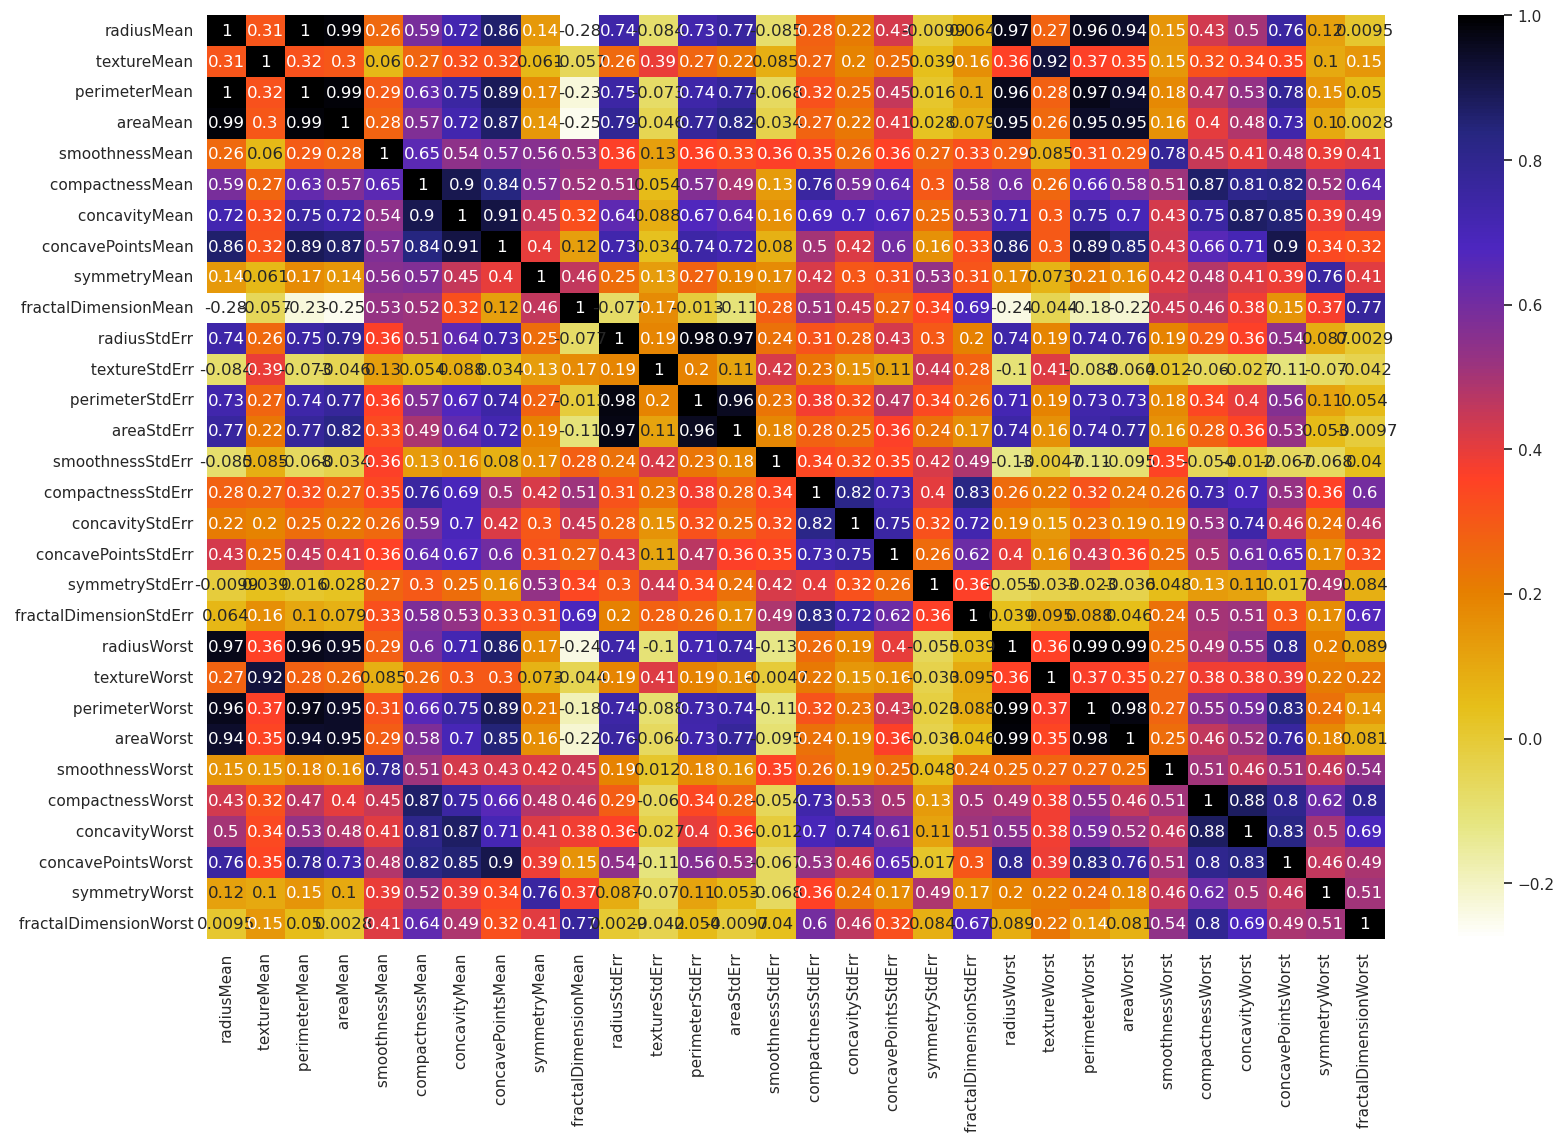

In [13]:
cor = X_train.corr()
plt.figure(figsize=(19,12))
sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
plt.show() 

## Find correlated features above a certain threshold

In [14]:
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]                  
                col_corr.add(colname)
                #print(i, colname)
    return col_corr  

corr_features = correlation(X_train, 0.8)
corr_features

{' areaMean',
 ' areaStdErr',
 ' areaWorst',
 ' compactnessWorst',
 ' concavePointsMean',
 ' concavePointsWorst',
 ' concavityMean',
 ' concavityStdErr',
 ' concavityWorst',
 ' fractalDimensionStdErr',
 ' perimeterMean',
 ' perimeterStdErr',
 ' perimeterWorst',
 ' radiusWorst',
 ' textureWorst'}

## Performing a Grid Search (with cross-validation) for parameter tuning of Logistic Regression

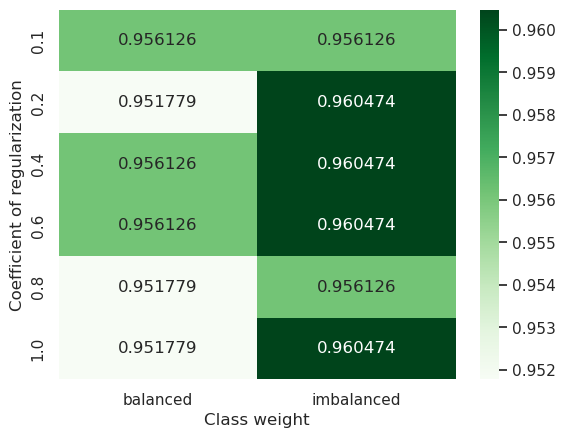

In [15]:
from sklearn.linear_model import LogisticRegression

a = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
b = ['balanced', 'imbalanced']
param_grid = dict(C=a, class_weight=b)

clf = LogisticRegression()

grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_contour = grid_results.groupby(['C','class_weight']).mean()
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['Coefficient of regularization', 'Class weight', 'Accuracy']
grid_pivot = grid_reset.pivot('Coefficient of regularization', 'Class weight')
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

fig = plt.gcf()

sns.heatmap(grid_pivot['Accuracy'],annot=True,cmap='Greens', fmt='g')

plt.show()
plt.draw()

fig.savefig('TUNEbreastLR.png', dpi=100)

## Logistic Regression and hold-out evaluation / Confusion matrix

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        36
        True       1.00      1.00      1.00        21

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

score:  1.0


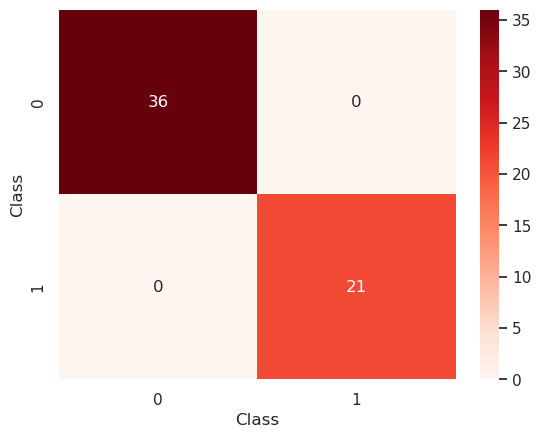

In [16]:
LR = LogisticRegression(class_weight = 'imbalanced', C=1.)

LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

#Evaluation
print(classification_report(y_test, y_pred, zero_division = 0))
print("score: ", LR.score(X_test, y_test))
M = confusion_matrix(y_test, y_pred)

fig = plt.gcf()

sns.heatmap(M,annot=True,cmap='Reds', fmt='g')
plt.xlabel('Class')
plt.ylabel('Class')

plt.show()
plt.draw()
fig.savefig('CMbreastLR.png', dpi=100)

## Performing a Grid Search (with cross-validation) for parameter tuning of k-NN

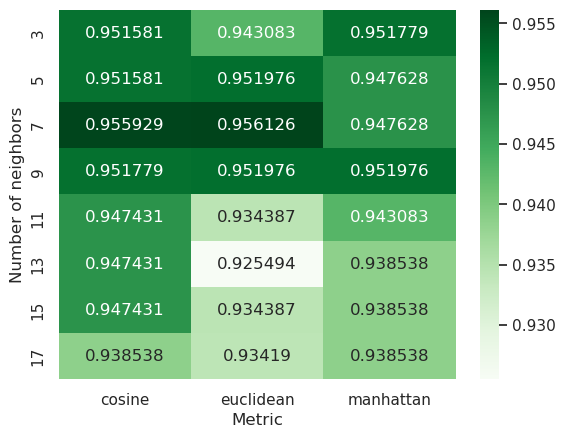

In [17]:
from sklearn.neighbors import KNeighborsClassifier

#a = ['uniform', 'distance']
a = ['manhattan', 'euclidean', 'cosine']
b = [3,5,7,9,11,13,15,17]
param_grid = dict( n_neighbors=b, metric=a)

clf = KNeighborsClassifier()

grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_contour = grid_results.groupby(['n_neighbors','metric']).mean()
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['Number of neighbors','Metric', 'Accuracy']
grid_pivot = grid_reset.pivot('Number of neighbors','Metric')
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

fig = plt.gcf()

sns.heatmap(grid_pivot['Accuracy'],annot=True,cmap='Greens', fmt='g')

plt.show()
plt.draw()

fig.savefig('TUNEbreastkNN.png', dpi=100)


## Performing a Grid Search (with cross-validation) for parameter tuning of k-NN

              precision    recall  f1-score   support

       False       0.97      0.97      0.97        36
        True       0.95      0.95      0.95        21

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57

score:  0.9649122807017544


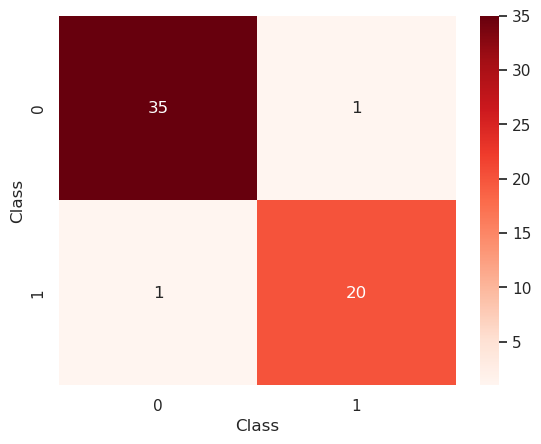

In [18]:
kNN = KNeighborsClassifier(n_neighbors = 7)

kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)

#Evaluation
print(classification_report(y_test, y_pred, zero_division = 0))
print("score: ", kNN.score(X_test, y_test))
M = confusion_matrix(y_test, y_pred)

fig = plt.gcf()

sns.heatmap(M,annot=True,cmap='Reds', fmt='g')
plt.xlabel('Class')
plt.ylabel('Class')

plt.show()
plt.draw()
fig.savefig('CMbreastkNN.png', dpi=100)

## Performing a Grid Search (with cross-validation) for parameter tuning of SVC

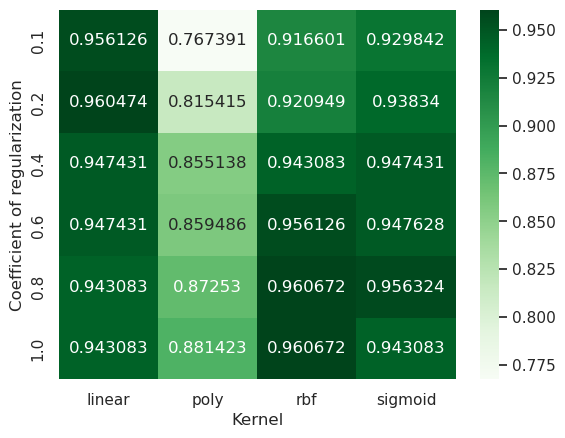

In [19]:
from sklearn.svm import SVC

c = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
kernels = ['linear','rbf', 'sigmoid','poly']
param_grid = dict(C=c, kernel=kernels)

clf = SVC()

grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)
grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_contour = grid_results.groupby(['C','kernel']).mean()
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['Coefficient of regularization', 'Kernel', 'Accuracy']
grid_pivot = grid_reset.pivot('Coefficient of regularization', 'Kernel')
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

fig = plt.gcf()

sns.heatmap(grid_pivot['Accuracy'],annot=True,cmap='Greens', fmt='g')

plt.show()
plt.draw()
fig.savefig('TUNEbreastSVM.png', dpi=600)


## Hold-out with best parameters of SVC / Confusion matrix

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        36
        True       1.00      1.00      1.00        21

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57

score:  1.0


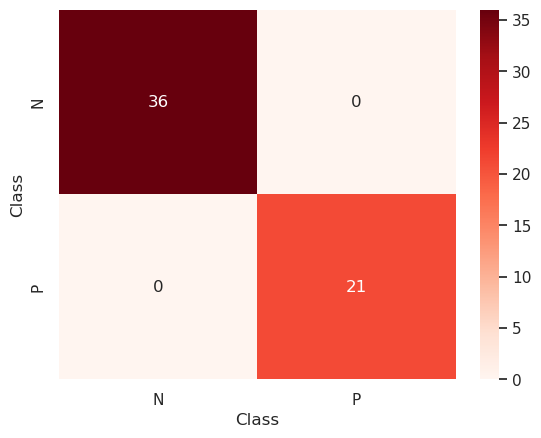

In [20]:
svm = SVC(kernel='linear', C=0.2)
#y_train =y_train.astype('int') 
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

#Evaluation
print(classification_report(y_test, y_pred, zero_division = 0))
print("score: ", svm.score(X_test, y_test))
M = confusion_matrix(y_test, y_pred)

fig = plt.gcf()

sns.heatmap(M,annot=True,cmap='Reds', fmt='g')
plt.xticks([0.5,1.5], ['N', 'P'])
plt.yticks([0.5,1.5], ['N', 'P'])


plt.xlabel('Class')
plt.ylabel('Class')

plt.show()
plt.draw()
#fig.savefig('CMbreastSVM.png', dpi=100)